In [21]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
#from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import learning_curve
from sklearn import tree, metrics
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import  cross_val_score
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from time import time
from operator import itemgetter
from sklearn.model_selection import validation_curve
import datetime

import sklearn.preprocessing as preprocessing
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

#import graphviz 
import timeit
import os
from IPython.display import Image

In [2]:
bank_data = pd.read_csv('bank-full.csv', delimiter = ";", header="infer")
len(bank_data)

45211

In [3]:
bank_data.shape

(45211, 17)

In [4]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Change data format

In [5]:
bank_data = pd.get_dummies(bank_data, columns=['job','marital',
                                         'education','default',
                                         'housing','loan',
                                         'contact','month',
                                         'poutcome'])

In [6]:
bank_data.y.replace(('yes','no'), (1,0), inplace = True)


In [7]:
bank_data.y.unique()

array([0, 1], dtype=int64)

In [8]:
bank_data.shape

(45211, 52)

In [9]:
y = bank_data['y']
del bank_data['y']

In [10]:
bank_data.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [11]:

# Train - Test split# Train  
X_train, X_test, y_train, y_test = train_test_split(bank_data, y, test_size  = 0.3)

print("Training dataset size: ", len(X_train))
print("Testing dataset size: ", len(X_test))
print("Training label dataset size: ", len(y_train))
print("Testing label dataset size: ", len(y_test))

Training dataset size:  31647
Testing dataset size:  13564
Training label dataset size:  31647
Testing label dataset size:  13564


In [12]:
#min_max_scaler = preprocessing.MinMaxScaler()
#X_train = min_max_scaler.fit_transform(X_train)
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

### Check for hyper paramters using kernel

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

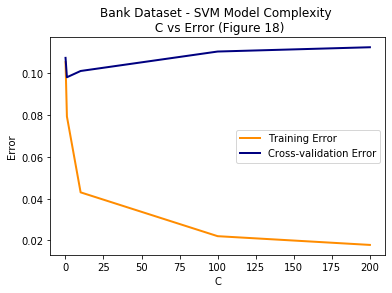

train_scores = [0.89460297 0.92061649 0.95697066 0.97796789 0.98215471]
test_scores = [0.89253334 0.90182341 0.8988215  0.88949985 0.88744592]
Optimal C =  1  Minimum Error =   0.09817658727335754


In [13]:

np.random.seed(55)
'''
classifier = SVC()



kernels = ["rbf", "linear", "poly", "sigmoid"]
train_error = np.zeros(4)
cv_error = np.zeros(4)
j = 0
for kernel_ in kernels:
    classifier = SVC(kernel = kernel_)
    scores = cross_val_score(classifier, X_train, y_train, cv =5)
    cv_error[j] = 1 - np.mean(scores)
    j = j + 1
print(cv_error)
'''

param_range = [0.1, 1, 10, 100, 200]
classifier = SVC()

train_scores, test_scores = validation_curve( classifier, X_train, y_train, param_name="C", param_range=param_range,
    cv=5, scoring=make_scorer(accuracy_score), n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.title("Bank Dataset - SVM Model Complexity \n C vs Error (Figure 18)")
plt.xlabel("C")
plt.ylabel("Error")


lw = 2
plt.plot(param_range, 1 - train_mean, label="Training Error",
             color="darkorange", lw=lw)
plt.plot(param_range, 1 - test_mean, label="Cross-validation Error",
             color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

print("train_scores =", train_mean)
print("test_scores =", test_mean)
print("Optimal C = ",  param_range[np.ndarray.argmax(test_mean)], " Minimum Error =  " , (1 - np.amax(test_mean))  )


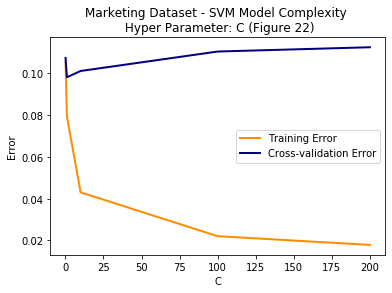

In [18]:
train_scores = [0.89460297, 0.92061649, 0.95697066, 0.97796789, 0.98215471]
test_scores = [0.89253334, 0.90182341, 0.8988215,  0.88949985, 0.88744592]

train_mean = np.array(train_scores)
test_mean = np.array(test_scores)

plt.title("Marketing Dataset - SVM Model Complexity \n Hyper Parameter: C (Figure 22)")
plt.xlabel("C")
plt.ylabel("Error")


lw = 2
plt.plot(param_range, 1 - train_mean, label="Training Error",
             color="darkorange", lw=lw)
plt.plot(param_range, 1 - test_mean, label="Cross-validation Error",
             color="navy", lw=lw)
plt.legend(loc="best")
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

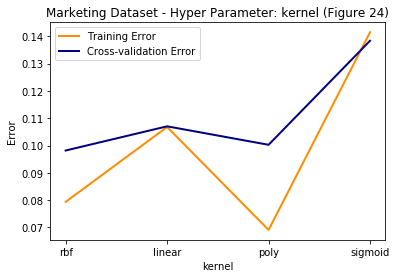

train_scores = [0.92061649 0.89322053 0.93088603 0.85854902]
test_scores = [0.90182341 0.89297575 0.89973794 0.86166146]
Optimal C =  rbf  Minimum Error =   0.09817658727335754


In [19]:
np.random.seed(55)

classifier = SVC()
kernels = ["rbf", "linear", "poly", "sigmoid"]

train_scores, test_scores = validation_curve( classifier, X_train, y_train, param_name="kernel", param_range=kernels,
    cv=5, scoring=make_scorer(accuracy_score), n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.title("Marketing Dataset - Hyper Parameter: kernel (Figure 24)")
plt.xlabel("kernel")
plt.ylabel("Error")


lw = 2
plt.plot(kernels, 1 - train_mean, label="Training Error",
             color="darkorange", lw=lw)
plt.plot(kernels, 1 - test_mean, label="Cross-validation Error",
             color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

print("train_scores =", train_mean)
print("test_scores =", test_mean)
print("Optimal C = ",  kernels[np.ndarray.argmax(test_mean)], " Minimum Error =  " , (1 - np.amax(test_mean))  )

### Create learning curve - Sample data set size vs. Error

In [20]:
np.random.seed(55)

classifier = SVC()

param_kernel = [ "sigmoid"]
param_C = [ 1.0, 10.0, 100.0, 200.0]

train_error = np.zeros(12)
cv_error = np.zeros(12)
j = 0
for kernel in param_kernel:
    for C in param_C:
        classifier = SVC(kernel = kernel, C = C)
        scores = cross_val_score(classifier, X_train, y_train, cv = 3)
        cv_error[j] = 1 - np.mean(scores)
        j = j + 1
print(cv_error)





[ 0.10569713  0.1024425   0.13707461  0.14339447  0.          0.          0.
  0.          0.          0.          0.          0.        ]


### Create learning curve 


train_scores = [0.93054129 0.92439265 0.92500329 0.92638752 0.92382683 0.92296248
 0.92253259 0.92169061 0.92075488 0.92059091]
test_scores = [0.89455575 0.89610405 0.89695713 0.89831589 0.89916908 0.89894793
 0.90062253 0.9007806  0.90191815 0.90179181]
train sizes = [ 2531  5063  7595 10126 12658 15190 17721 20253 22785 25317]


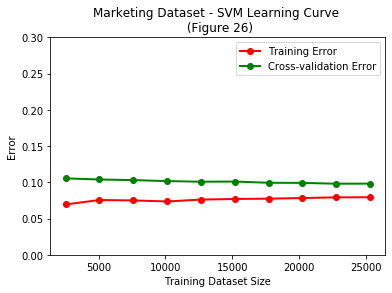

In [22]:
np.random.seed(55)
classifier = SVC(kernel = "rbf", C = 1)
st_train_time = timeit.default_timer() 
classifier.fit(X_train, y_train)
end_train_time = timeit.default_timer()

title = "Marketing Dataset - SVM Learning Curve \n (Figure 26)"
ylim=(0.0, 0.3)



plt.title(title)
if ylim is not None:
    plt.ylim(*ylim)
plt.xlabel("Training Dataset Size")
plt.ylabel("Error")
train_sizes, train_scores, test_scores = learning_curve(
    classifier, X_train, y_train, cv=5, n_jobs=4, train_sizes=np.linspace(.1, 1.0, 10))



train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
#test_scores_mean1 = np.mean(test_scores1, axis=1)

print("")
    
lw = 2
plt.plot(train_sizes, 1 - train_scores_mean, 'o-', color="r",
             label="Training Error",  lw=lw)
plt.plot(train_sizes, (1- test_scores_mean), 'o-', color="g",
             label="Cross-validation Error",  lw=lw)

plt.legend(loc="best")
print("train_scores =", train_scores_mean)
print("test_scores =", test_scores_mean)
print("train sizes =", train_sizes)

plt.show()

### Predict on Testing set

In [23]:
st_pred_time = timeit.default_timer() 
y_pred = classifier.predict(X_test)
end_pred_time = timeit.default_timer() 

pred_time = end_pred_time - st_pred_time

print("Accuracy: %s%%" % (100*accuracy_score(y_test, y_pred)))
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred, target_names=['y', 'n']))
print("AUC =", roc_auc_score(y_test, y_pred))
print("Prediction Time = ", pred_time)
print("Training Time = ", end_train_time - st_train_time)

Accuracy: 90.27572987319374%
[[11734   251]
 [ 1068   511]]
              precision    recall  f1-score   support

           y       0.92      0.98      0.95     11985
           n       0.67      0.32      0.44      1579

    accuracy                           0.90     13564
   macro avg       0.79      0.65      0.69     13564
weighted avg       0.89      0.90      0.89     13564

AUC = 0.6513398503459702
Prediction Time =  5.949226799999451
Training Time =  27.895082000000002
